# Plotting Sigmoid Function

In [1]:
import numpy as np
import matplotlib.pyplot as plt

$S_{w,b}(x) = \frac{1}{1 + e^{-(wx+b)}} $

In [2]:
def sigmoid(x,w,b):
    return 1/(1+np.exp(-(w*x + b)))

In [3]:
sigmoid(1,0.5,0)

0.6224593312018546

In [4]:
w = 0.9
b = 0.1

X = np.linspace(-10,10,100)
Y = sigmoid(X,w,b)

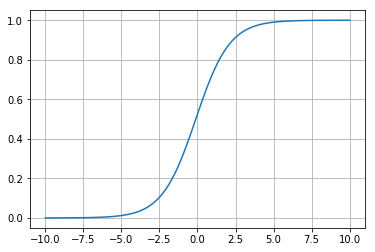

In [5]:
plt.plot(X,Y)
plt.grid(b=None, which='major', axis='both')
plt.show()

$S_{w_1,w_2,b}(x_1,x_2) = \frac{1}{1 + e^{-(w_1x_1 + w_2x_2 +b)}} $

In [6]:
def sigmoid_2d(x1,x2,w1,w2,b):
    return 1/(1 + np.exp(-(w1*x1 + w2*x2 + b)))

In [7]:
sigmoid_2d(1,0,0.5,1,0)

0.6224593312018546

In [8]:
from mpl_toolkits import mplot3d

In [9]:
X1 = np.linspace(-10,10,100)
X2 = np.linspace(-10,10,100)

XX1,XX2 = np.meshgrid(X,Y)

In [10]:
w1=0.5
w2=0.5
b=0

Y = sigmoid_2d(XX1,XX2,w1,w2,b)

In [11]:
from matplotlib import interactive
interactive(True)

In [12]:
%matplotlib qt
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(XX1, XX2, Y, cmap='viridis')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()

In [13]:
Y.shape

(100, 100)

In [14]:
plt.contourf(XX1,XX2,Y)
plt.show()

# Computing Loss for a given Dataset

In [14]:
w_unknown = 0.5
b_unknown = 0.25

X = np.random.random(25) * 20 - 10
Y = sigmoid(X,w_unknown,b_unknown)

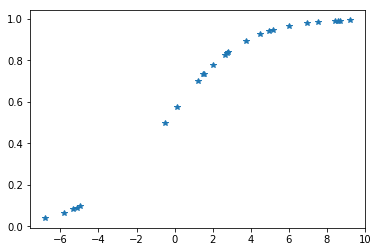

In [15]:
plt.plot(X,Y,'*')
plt.show()

In [16]:
def calculate_loss(X,Y,w_est,b_est):
    loss = 0
    for x,y in zip(X,Y):
        loss += (y - sigmoid(x,w_est,b_est)) ** 2
    return loss

In [17]:
W = np.linspace(0,2,101)
B = np.linspace(-1,1,101)

WW, BB = np.meshgrid(W,B)

In [18]:
Loss = np.zeros(WW.shape)

In [19]:
for i in range(WW.shape[0]):
    for j in range(WW.shape[1]):
        Loss[i,j] = calculate_loss(X,Y,WW[i,j],BB[i,j])
        

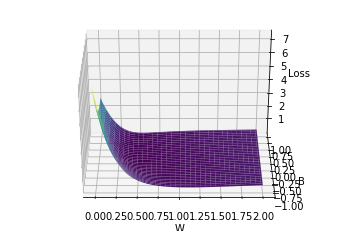

In [20]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(WW, BB, Loss, cmap='viridis')
ax.set_xlabel('W')
ax.set_ylabel('B')
ax.set_zlabel('Loss')

ax.view_init(30,270)

In [23]:
ij = np.argmin(Loss)
i = int(np.floor(ij/Loss.shape[1]))
j = int(ij - i * Loss.shape[1])

In [24]:
print(i,j)

62 25


In [25]:
print(WW[i,j],BB[i,j])

0.5 0.24


# Sigmoid Class

In [76]:
class SigmoidNeuron:
    
    def __init__(self):
        self.w = None
        self.b = None
        
    def perceptron(self,x):
        return np.dot(x,self.w.T) + self.b
    
    def sigmoid(self,x):
        return 1.0/(1.0 + np.exp(-x))
    
    def grad_w(self,x,y):
        y_pred = self.sigmoid(self.perceptron(x))
        return (y_pred-y) * y_pred * (1-y_pred) * x
    
    def grad_b(self,x,y):
        y_pred = self.sigmoid(self.perceptron(x))
        return (y_pred-y) * y_pred * (1-y_pred) * x
    
    def fit(self,X,Y,epochs=1,learning_rate=1,initialise = True):
        
        #initialise w,b
        if(initialise):
            self.w = np.random.randn(1,X.shape[1])
            self.b = 0
        
        #Go through the data
        for i in range(epochs):
            dw=0
            db=0
            
            for x,y in zip(X,Y):
                dw += self.grad_w(x,y)
                db += self.grad_b(x,y)
                
            #Update
            self.w -= learning_rate * dw
            self.b -= learning_rate * db            

# Fit for Toy data

In [77]:
X = np.asarray([[2.5,2.5],[4,-1],[1,-4],[3,1.25],[2,4],[1,5]])
Y = [1,1,1,0,0,0]


In [78]:
sn = SigmoidNeuron()
sn.fit(X,Y,1,0.25,True)

In [84]:
for i in range(20):
    print(sn.w,sn.b)
    sn.fit(X,Y,1,0.75,False)

[[ 0.23919165 -0.61213245]] [0.21132258 0.54329047]
[[ 0.23917367 -0.61211431]] [0.2113046  0.54330861]
[[ 0.23916953 -0.61211013]] [0.21130046 0.54331279]
[[ 0.23916858 -0.61210917]] [0.21129951 0.54331375]
[[ 0.23916836 -0.61210895]] [0.21129929 0.54331397]
[[ 0.23916831 -0.6121089 ]] [0.21129924 0.54331403]
[[ 0.23916829 -0.61210888]] [0.21129923 0.54331404]
[[ 0.23916829 -0.61210888]] [0.21129922 0.54331404]
[[ 0.23916829 -0.61210888]] [0.21129922 0.54331404]
[[ 0.23916829 -0.61210888]] [0.21129922 0.54331404]
[[ 0.23916829 -0.61210888]] [0.21129922 0.54331404]
[[ 0.23916829 -0.61210888]] [0.21129922 0.54331404]
[[ 0.23916829 -0.61210888]] [0.21129922 0.54331404]
[[ 0.23916829 -0.61210888]] [0.21129922 0.54331404]
[[ 0.23916829 -0.61210888]] [0.21129922 0.54331404]
[[ 0.23916829 -0.61210888]] [0.21129922 0.54331404]
[[ 0.23916829 -0.61210888]] [0.21129922 0.54331404]
[[ 0.23916829 -0.61210888]] [0.21129922 0.54331404]
[[ 0.23916829 -0.61210888]] [0.21129922 0.54331404]
[[ 0.2391682